In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
#Dummy Data just for understanding
df = pd.read_csv('50_Startups_new.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,YourTake
0,165349.20,136897.80,471784.10,New York,192261.83,1
1,162597.70,151377.59,443898.53,California,191792.06,1
2,153441.51,101145.55,407934.54,Florida,191050.39,1
3,144372.41,118671.85,383199.62,New York,182901.99,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0


In [4]:
df.shape

(50, 6)

In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,YourTake
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.540000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.503457
min,0.000000,51283.140000,0.000000,14681.400000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,1.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000


In [6]:
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit,YourTake
count,50.000000,50.000000,50.000000,50,50.000000,50.000000
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,New York,NaN,NaN
freq,NaN,NaN,NaN,17,NaN,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200,0.540000
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338,0.503457
min,0.000000,51283.140000,0.000000,NaN,14681.400000,0.000000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500,0.000000
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000,1.000000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   YourTake         50 non-null     int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 2.5+ KB


In [8]:
df['YourTake'].value_counts()

1    27
0    23
Name: YourTake, dtype: int64

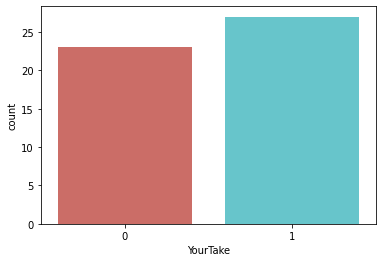

In [9]:
df.YourTake.value_counts()
sns.countplot(x = 'YourTake', data = df, palette = 'hls')
plt.show()

In [10]:
dummy = pd.get_dummies(df["State"])

In [11]:
df=pd.concat([dummy,df],axis=1)

In [12]:
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit,YourTake
0,0,0,1,165349.20,136897.80,471784.10,New York,192261.83,1
1,1,0,0,162597.70,151377.59,443898.53,California,191792.06,1
2,0,1,0,153441.51,101145.55,407934.54,Florida,191050.39,1
3,0,0,1,144372.41,118671.85,383199.62,New York,182901.99,1
4,0,1,0,142107.34,91391.77,366168.42,Florida,166187.94,0


In [13]:
df.drop(['State'],inplace=True,axis=1)

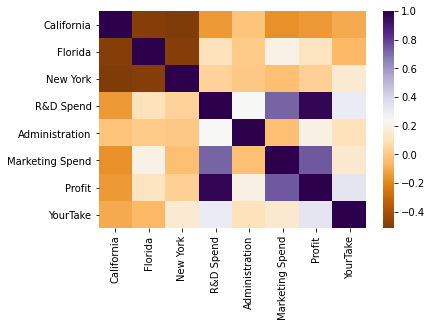

In [14]:
corr_matrix=df.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')

In [15]:
X= df.iloc[:,0:7].values

In [16]:
# X

In [17]:
y=df.iloc[:,-1:].values

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
hyper_parameter = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

In [19]:
lg1 = LogisticRegression()
lg2 = LogisticRegression(C=100,penalty='l1',solver='liblinear')
lg3 = GridSearchCV(LogisticRegression(), hyper_parameter, scoring = 'f1', cv=5)

#### Fitting data to normal classifier without scaling

In [20]:
lg1.fit(X_train,y_train)
y_pred = lg1.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg1.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.50
[[2 3]
 [2 3]]


Text(0.5, 257.44, 'Predicted label')

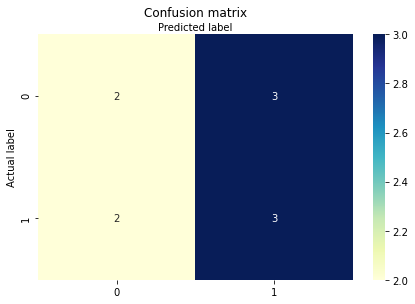

In [21]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5
Precision: 0.5
Recall: 0.6


#### Scaling the features
##### StandardScaler, RobustScaler, Normalizer

In [23]:
df1 = df.iloc[:,0:7].values

In [24]:
scale1 = preprocessing.StandardScaler()
scale2 = preprocessing.RobustScaler()
scale3 = preprocessing.Normalizer()

In [25]:
scale_df1 = scale1.fit_transform(df1)
scale_df2 = scale2.fit_transform(df1)
scale_df3 = scale3.fit_transform(df1)

#### Fitting scaled (StandardScaled) Data to normal classifier

In [26]:
X=scale_df1
y=df.iloc[:,-1:].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg1.fit(X_train,y_train)
y_pred=lg1.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg1.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.60
[[3 2]
 [2 3]]


Text(0.5, 257.44, 'Predicted label')

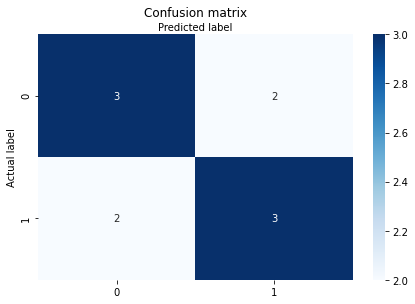

In [27]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6
Precision: 0.6
Recall: 0.6


#### Fitting scaled (RobustScaler) Data to normal classifier

In [29]:
X=scale_df2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg1.fit(X_train,y_train)
y_pred=lg1.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg1.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.70
[[3 2]
 [1 4]]


Text(0.5, 257.44, 'Predicted label')

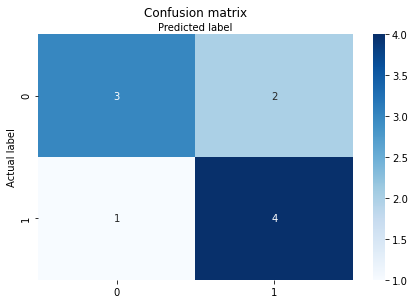

In [30]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7
Precision: 0.6666666666666666
Recall: 0.8


#### Fitting scaled (Normalizer) Data to normal classifier

In [32]:
X=scale_df3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg1.fit(X_train,y_train)
y_pred=lg1.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg1.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.50
[[0 5]
 [0 5]]


Text(0.5, 257.44, 'Predicted label')

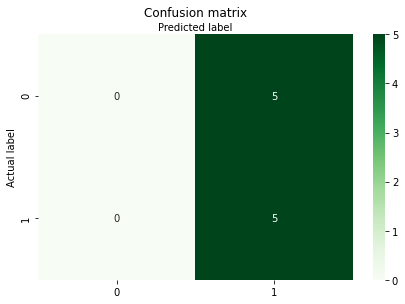

In [33]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="Greens" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5
Precision: 0.5
Recall: 1.0


#### Fitting scaled (StandardScaled) Data to tuned classifier

In [35]:
X=scale_df1
y=df.iloc[:,-1:].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg2.fit(X_train,y_train)
y_pred=lg2.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg2.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.50
[[2 3]
 [2 3]]


Text(0.5, 257.44, 'Predicted label')

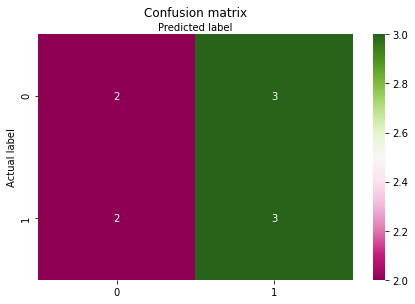

In [36]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="PiYG" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5
Precision: 0.5
Recall: 0.6


#### Fitting scaled (StandardScaler) Data to tunned_2 classifie

In [ ]:
X=scale_df1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg3.fit(X_train, y_train)

print(lg3.best_estimator_)
print("My clasiifier accuracy is == {:.2f}".format(lg3.score(X_test,y_test)))

y_pred=lg3.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

#### Fitting scaled (RobustScaler) Data to tunned classifier

In [45]:
X=scale_df2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg2.fit(X_train,y_train)
y_pred=lg2.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg2.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.50
[[2 3]
 [2 3]]


Text(0.5, 257.44, 'Predicted label')

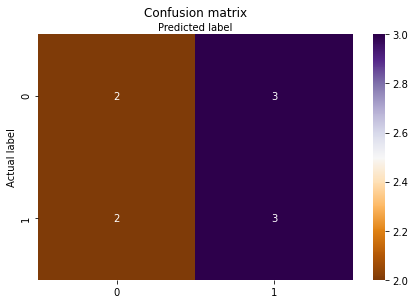

In [46]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="PuOr" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [47]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5
Precision: 0.5
Recall: 0.6


#### Fitting scaled (RobustScaler) Data to tunned_2 classifier

In [48]:
X=scale_df2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg3.fit(X_train, y_train)

print(lg3.best_estimator_)
print("My clasiifier accuracy is == {:.2f}".format(lg3.score(X_test,y_test)))

y_pred=lg3.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
My clasiifier accuracy is == 0.67
[[0 5]
 [0 5]]


#### Fitting scaled (Normalizer) Data to normal classifier

In [41]:
X=scale_df3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg2.fit(X_train,y_train)
y_pred=lg2.predict(X_test)
print("My clasiifier accuracy is == {:.2f}".format(lg2.score(X_test,y_test)))
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

My clasiifier accuracy is == 0.60
[[2 3]
 [1 4]]


Text(0.5, 257.44, 'Predicted label')

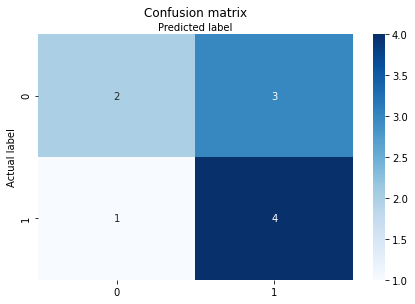

In [42]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6
Precision: 0.5714285714285714
Recall: 0.8


In [44]:
X=scale_df3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
lg3.fit(X_train, y_train)

print(lg3.best_estimator_)
print("My clasiifier accuracy is == {:.2f}".format(lg3.score(X_test,y_test)))

y_pred=lg3.predict(X_test)

conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
My clasiifier accuracy is == 0.67
[[2 3]
 [1 4]]
